In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
file_path = '/content/BUS_PROFILE_DATA.csv'
data = pd.read_csv(file_path)

In [ ]:
# Inspect the first few rows of the data
print(data.head())

                            BUS_NAME                   BUS_TYPE        CITY  \
0                      Alto Palo Inc                  Taco Bell      Aurora   
1  Columbia Basin Health Association      Wahluke Family Clinic     Mattawa   
2      Computer Sciences Corporation                        NaN   Camarillo   
3      Northern States Power Company                XCEL Energy  Saint Paul   
4                 Ufp Riverside, LLC  Universal Forest Products   Riverside   

  STATE_CD COUNTRY_NAME  EMPLOYEES_WORKING_HERE  EMPLOYEES_TOTAL  \
0       CO          USA                       1                0   
1       WA          USA                      45                0   
2       CA          USA                       3                0   
3       MN          USA                       1                0   
4       CA          USA                      42               42   

   NO_OF_FMLY_MMBRS  YEAR_ESTABLISHED CURRENCY_CODE  ... DPV_CONFIRM  \
0                77                 0       

In [ ]:
# Select relevant columns for segmentation
spend_columns = [
    'BUS_EST_NETWORK_SPEND',
    'BUS_EST_SECURITY_SPEND',
    'BUS_EST_VOICE_SPEND',
    'BUS_EST_TOT_SPEND'
]

In [ ]:
# Filter out rows with missing values in the selected columns
data = data.dropna(subset=spend_columns)


In [ ]:
# Normalize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[spend_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

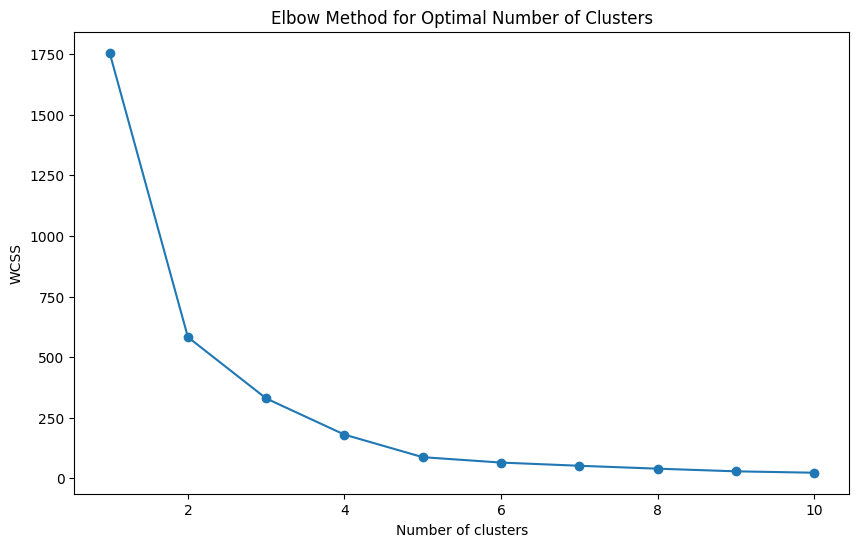

In [ ]:
# Import the KMeans class
from sklearn.cluster import KMeans

# Calculate WCSS for different cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42) # Initialize KMeans with i clusters
    kmeans.fit(scaled_data) # Fit the model to your scaled data
    wcss.append(kmeans.inertia_) # Append the inertia_ (WCSS) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# From the plot, choose the optimal number of clusters, say 2 for this example
optimal_clusters = 2

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Define the threshold for high-value customers (You can adjust this threshold as per the dataset)
# Assuming that the threshold for each spend category is set as the 75th percentile of the data
network_threshold = data['BUS_EST_NETWORK_SPEND'].quantile(0.75) # Use 'data' instead of 'df'
security_threshold = data['BUS_EST_SECURITY_SPEND'].quantile(0.75) # Use 'data' instead of 'df'
voice_threshold = data['BUS_EST_VOICE_SPEND'].quantile(0.75) # Use 'data' instead of 'df'
tot_spend_threshold = data['BUS_EST_TOT_SPEND'].quantile(0.75) # Use 'data' instead of 'df'

In [ ]:
# Function to classify customers
def classify_customer(row):
    if (row['BUS_EST_NETWORK_SPEND'] >= network_threshold or
        row['BUS_EST_SECURITY_SPEND'] >= security_threshold or
        row['BUS_EST_VOICE_SPEND'] >= voice_threshold or
        row['BUS_EST_TOT_SPEND'] >= tot_spend_threshold):
        return 'High-Value'
    else:
        return 'Low-Value'

In [ ]:
# Apply the classification
data['Customer_Segment'] = data.apply(classify_customer, axis=1) # Use 'data' instead of 'df'

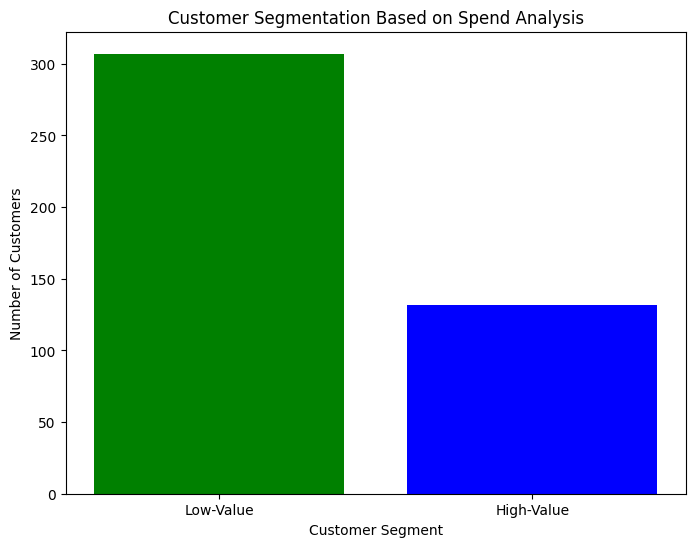

In [ ]:
# Plot the distribution of customer segments
segment_counts = data['Customer_Segment'].value_counts() # Use 'data' instead of 'df'
plt.figure(figsize=(8,6))
plt.bar(segment_counts.index, segment_counts.values, color=['green', 'blue'])
plt.title('Customer Segmentation Based on Spend Analysis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
# Display the first few rows of the dataframe with the new segmentation
data.head()

,BUS_NAME,BUS_TYPE,CITY,STATE_CD,COUNTRY_NAME,EMPLOYEES_WORKING_HERE,EMPLOYEES_TOTAL,NO_OF_FMLY_MMBRS,YEAR_ESTABLISHED,CURRENCY_CODE,...,CARRIER_LINE_TYPE,BUS_EST_NETWORK_SPEND,BUS_EST_SECURITY_SPEND,BUS_EST_SERVICES_SPEND,BUS_EST_VOICE_SPEND,BUS_EST_TOT_SPEND,BUS_SEGMENT,MNC_INDR,Cluster,Customer_Segment
0,Alto Palo Inc,Taco Bell,Aurora,CO,USA,1,0,77,0,NaN,...,WIRELINE,82460.97,13183.94,10403.21,2627.10,108675.0,INSIDE_NAMED,N,0,Low-Value
1,Columbia Basin Health Association,Wahluke Family Clinic,Mattawa,WA,USA,45,0,4,0,NaN,...,WIRELINE,12151.43,21931.86,12663.90,1877.27,48624.0,REGIONAL_ENTERPRISE,N,0,Low-Value
2,Computer Sciences Corporation,NaN,Camarillo,CA,USA,3,0,1182,0,NaN,...,NaN,123552.42,22866.14,41703.62,33293.05,221415.0,KEY,Y,0,High-Value
4,"Ufp Riverside, LLC",Universal Forest Products,Riverside,CA,USA,42,42,284,2016,NaN,...,WIRELINE,398892.50,24346.25,242909.59,54574.86,720723.0,LARGE,Y,0,High-Value
5,"Expeditors International of Washington, Inc.",Expeditors International,Sumner,WA,USA,10,0,367,0,NaN,...,WIRELINE,113245.11,60849.20,229195.73,26973.93,430264.0,LARGE,Y,0,High-Value


In [ ]:
# Save the dataframe to a CSV file
df.to_csv('/content/segmented_customers.csv', index=False)

# Provide a link to download the CSV file
from google.colab import files
files.download('/content/segmented_customers.csv')

NameError: name 'df' is not defined

In [ ]:
# Save the dataframe to a CSV file
data.to_csv('/content/segmented_customers.csv', index=False) # Changed 'df' to 'data'

# Provide a link to download the CSV file
from google.colab import files
files.download('/content/segmented_customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>